In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->



In [3]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

The dataset contains a mix of numeric features and categorical features. The target reviews_per_month is a numeric feature, which suggests that this is a regression problem, so we probably need to convert the categorical features and text features into numeric when preprocessing the data.

In [4]:
original_data = pd.read_csv("data/AB_NYC_2019.csv")
#original_data.dropna(subset=['reviews_per_month'], inplace=True)
original_data['reviews_per_month'].fillna(0, inplace=True)
print(original_data.shape)
original_data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
train, test = train_test_split(
    original_data, test_size = 0.3, random_state = 123)

X_train, y_train = train.drop(columns=["reviews_per_month"]), train["reviews_per_month"]
X_test, y_test = test.drop(columns=["reviews_per_month"]), test["reviews_per_month"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(34226, 15)
(34226,)
(14669, 15)
(14669,)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [6]:
X_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
36150,28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,1,17
45223,34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,20,332
14316,11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,1,0
1691,766814,Adorable Midtown West Studio!,4022922,Caitlin,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,NaN,1,0
20195,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,1,0


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

In [8]:
X_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


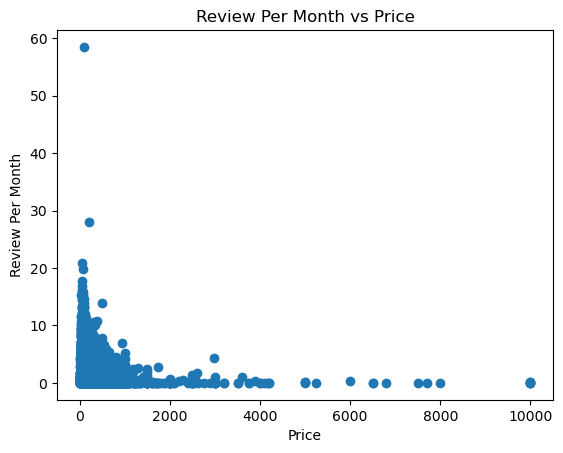

In [9]:
price = X_train['price']
plt.scatter(price, y_train)
plt.xlabel('Price')
plt.ylabel('Review Per Month')
plt.title('Review Per Month vs Price')
plt.show()

This scatter plot displays price on x-axis and reviews_per_month on y-axis. It displays a decreasing trend: cheaper price tend to have more reviews per month.

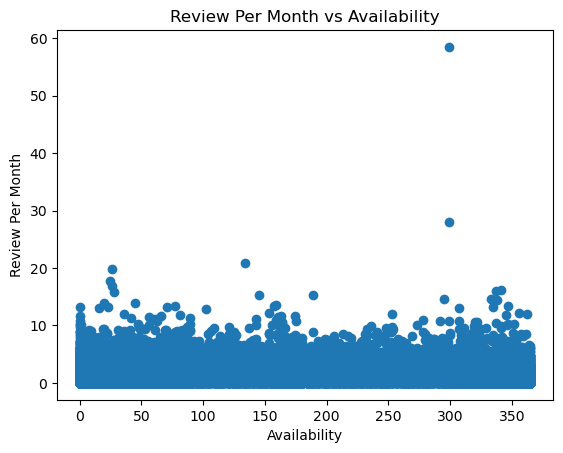

In [10]:
availability = X_train['availability_365']
plt.scatter(availability, y_train)
plt.xlabel('Availability')
plt.ylabel('Review Per Month')
plt.title('Review Per Month vs Availability')
plt.show()

This scatter plot displays reviews_per_month vs availability. It looks like a uniform distribution and there is no obvious pattern in how availability influence reviews per months.

There are a some columns with Null values, including name, host_name, and last_reviews. For summary statistics, the mean value of price is 151.53, and the standard deviation of price is 236.63. The mean availability is 112.5, and the standard deviation is 131.42.

We will choose neg_root_mean_squared_error as the metrics we use for assessment.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

id: drop

name: simpleImputer, CountVectorizer

host_id: drop

host_name: drop

neighbourhood_group: onehotencoder

neighbourhood: drop

latitude: standardscaler

longitude: standardscaler

room_type: ordinalencoder

price: standardscaler

minimum_nights: stadardscaler

number_of_reviews: drop

last_review: drop

calculated_host_listings_count: stadardscaler

availability_365: standardscaler


In [12]:
room_type = X_train["room_type"].unique()
print(room_type)
neighbourhood_group = X_train["neighbourhood_group"].unique()
print(neighbourhood_group)
neighbourhood = X_train["neighbourhood"].unique()
print(neighbourhood)

['Entire home/apt' 'Private room' 'Shared room']
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Washington Heights' "Hell's Kitchen" 'Williamsburg' 'Park Slope'
 'Bedford-Stuyvesant' 'Fort Greene' 'Harlem' 'East Flatbush'
 'East Village' 'Jamaica' 'Upper West Side' 'Murray Hill'
 'Financial District' 'Long Island City' 'Clifton' 'Carroll Gardens'
 'Midtown' 'Upper East Side' 'Crown Heights' 'East Elmhurst'
 'Middle Village' 'Vinegar Hill' 'East Harlem' 'Theater District'
 'Ridgewood' 'Morningside Heights' 'Kips Bay' 'Kingsbridge' 'Sunnyside'
 'Maspeth' 'Gowanus' 'Bushwick' 'Tribeca' 'Astoria' 'Chinatown' 'Chelsea'
 'Flushing' 'Rego Park' 'Clinton Hill' 'Lower East Side' 'Kensington'
 'Pelham Gardens' 'Sunset Park' 'Fort Hamilton' 'Prospect Heights'
 'Nolita' 'East New York' 'Borough Park' 'West Village' 'Highbridge'
 'Elmhurst' 'Edgemere' 'Concord' 'Cypress Hills' 'Gramercy'
 'Windsor Terrace' 'Inwood' 'Flatbush' 'SoHo' 'Laurelton'
 'Prospect-Lefferts Gardens' 'Boerum Hill

In [13]:
numeric_feats = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
categorical_feats = ['neighbourhood_group']
ordinal_feats = ['room_type']
#text_feats = ['name']
drop_feats = ['id', 'host_name', 'host_id', 'number_of_reviews', 'neighbourhood', 'last_review', 'name']

In [14]:
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), 
                                    StandardScaler())

room_levels = [['missing','Shared room', 'Private room', 'Entire home/apt']]
ordinal_transformer = make_pipeline(
    OrdinalEncoder(categories=room_levels, dtype=int, 
                   handle_unknown="use_encoded_value", unknown_value = -1))

categorical_transformer = make_pipeline(SimpleImputer(strategy="constant", 
                                                      fill_value="missing"),
                                        OneHotEncoder(categories="auto", 
                                                      handle_unknown="ignore", 
                                                      sparse_output = True)) 

# text_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
#                                  CountVectorizer(max_features=5, stop_words='english', lowercase=False))

In [15]:
column_transformer = make_column_transformer(
    (numeric_transformer, numeric_feats),
    (categorical_transformer, categorical_feats),
    (ordinal_transformer, ordinal_feats),
#    (text_transformer, text_feats),
    ("drop", drop_feats)
)

In [16]:
transformed_data = column_transformer.fit_transform(X_train)

In [17]:
column_transformer.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 'pipeline-3': Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['missing', 'Shared room',
                                              'Private room',
                                              'Entire home/apt']],
                                 dtype=<class 'int'>,
                                 handle_unknown='use_encoded_value',
                                 unknown_value=-1))]),
 'drop': 'drop'}

In [18]:
column_names = (
    numeric_feats
    + column_transformer
    .named_transformers_["pipeline-2"]
    .get_feature_names_out().tolist()
    + ordinal_feats
#    + passthrough_feats
)
column_names

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type']

In [19]:
transformed_X_train = pd.DataFrame(transformed_data, columns=column_names)
transformed_X_train.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type
0,1.896525,0.166302,-0.234668,-0.143631,-0.185406,-0.726886,0.0,0.0,1.0,0.0,0.0,3.0
1,0.590461,-0.885425,-0.006459,1.062979,0.397589,1.670044,0.0,0.0,1.0,0.0,0.0,3.0
2,-0.329211,0.024095,0.204846,-0.282855,-0.185406,-0.856244,0.0,1.0,0.0,0.0,0.0,2.0
3,0.547550,-0.935425,-0.238895,-0.282855,-0.185406,-0.856244,0.0,0.0,1.0,0.0,0.0,3.0
4,-0.294919,0.076259,0.200620,-0.190039,-0.185406,-0.856244,0.0,1.0,0.0,0.0,0.0,3.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
dummy_pipe = make_pipeline(column_transformer, DummyRegressor(strategy="mean"))

In [21]:
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['missing',
                                                                                               'Shared '
                                                                                               'room',
                                                                                               'Private '
                                                                                               'room',
                                                                                               'Entire '
                                                                                               'home/apt']],
                                                                                  dtype=<class 'int'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'host_name', 'host_id',
                                                   'number_of_reviews',
                                                   'neighbourhood',
                                                   'last_review', 'name'])])),
                ('dummyregressor', DummyRegressor())])

In [22]:
dummy_scores = cross_validate(dummy_pipe, X_train, y_train, scoring="neg_root_mean_squared_error", return_train_score=True)

In [23]:
pd.DataFrame(dummy_scores)

,fit_time,score_time,test_score,train_score
0,0.030395,0.008269,-1.606253,-1.616566
1,0.028850,0.007321,-1.610708,-1.615458
2,0.026614,0.007204,-1.704226,-1.591290
3,0.026321,0.007147,-1.565892,-1.626435
4,0.026179,0.007156,-1.581946,-1.622553


<!-- END QUESTION -->



In [24]:
dummy_pipe.predict(X_test)

array([1.09005785, 1.09005785, 1.09005785, ..., 1.09005785, 1.09005785,
       1.09005785])

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [25]:
linear_pipe = make_pipeline(column_transformer, Ridge())
linear_pipe.fit(X_train, y_train)
ridge_scores = cross_validate(linear_pipe, X_train, y_train, scoring="neg_root_mean_squared_error",return_train_score = True)
pd.DataFrame(ridge_scores)

,fit_time,score_time,test_score,train_score
0,0.031663,0.007676,-1.540640,-1.559141
1,0.029351,0.007294,-1.559141,-1.554453
2,0.029739,0.007340,-1.647316,-1.531525
3,0.028975,0.007310,-1.502961,-1.568215
4,0.029957,0.007282,-1.529212,-1.562043


In [26]:
results_dict = {
    "alpha": [0, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    "mean_train_scores": [],
    "std_train_scores": [],
    "mean_cv_scores": [],
    "std_cv_scores": []
}
for alpha in results_dict["alpha"]:
    linear_pipe = make_pipeline(column_transformer, Ridge(alpha=alpha))
    scores = cross_validate(linear_pipe, X_train, y_train, scoring="neg_root_mean_squared_error", return_train_score=True)
    results_dict["mean_train_scores"].append(scores["train_score"].mean())
    results_dict["std_train_scores"].append(scores["train_score"].std())
    results_dict["mean_cv_scores"].append(scores["test_score"].mean())
    results_dict["std_cv_scores"].append(scores["test_score"].std())


/Users/suyingwang/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.22744e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [27]:
pd.DataFrame(results_dict)

,alpha,mean_train_scores,std_train_scores,mean_cv_scores,std_cv_scores
0,0.00,-1.555099,0.012559,-1.555907,0.049254
1,0.01,-1.555075,0.012592,-1.555854,0.049224
2,0.10,-1.555075,0.012592,-1.555854,0.049224
3,1.00,-1.555075,0.012592,-1.555854,0.049224
4,10.00,-1.555077,0.012592,-1.555853,0.049227
5,100.00,-1.555164,0.012591,-1.555917,0.049250
6,1000.00,-1.555874,0.012595,-1.556476,0.049395
7,10000.00,-1.561905,0.012573,-1.561900,0.050041


The mean train scores and the mean cross-validation scores are about the same for these alpha values we choose. The standard deviation for these scores are also similar. When alpha value is 10, the model produces the best result. Its cross_validation neg_root_mean_squared_errors is the highest, and its training neg_root_mean_squared_error is not high which suggests that they are not overfitting on the training set.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [28]:
svr_pipe = make_pipeline(column_transformer, SVR())
svr_pipe.fit(X_train, y_train)
svr_scores = cross_validate(svr_pipe, X_train, y_train, scoring="neg_root_mean_squared_error",return_train_score = True)
pd.DataFrame(svr_scores)

,fit_time,score_time,test_score,train_score
0,43.894556,16.957475,-1.457770,-1.476123
1,43.865061,16.870025,-1.481619,-1.468434
2,44.145601,16.922311,-1.569564,-1.446488
3,44.303370,16.953868,-1.410262,-1.486966
4,44.039449,16.933763,-1.443793,-1.474001


In [29]:
pipe_rf= make_pipeline(
    column_transformer,
    RandomForestRegressor(
        n_jobs=-1,
        random_state=123,
    ),
)
pipe_rf.fit(X_train, y_train)
rf_scores = cross_validate(pipe_rf, X_train, y_train, scoring="neg_root_mean_squared_error",return_train_score = True)
pd.DataFrame(rf_scores)

,fit_time,score_time,test_score,train_score
0,4.094065,0.067282,-1.254954,-0.479653
1,3.999973,0.056270,-1.300674,-0.481252
2,4.059133,0.054167,-1.403575,-0.471809
3,3.954452,0.060867,-1.223792,-0.491733
4,3.950092,0.054266,-1.256548,-0.488227


In [30]:
pipe_sklearn_GB = make_pipeline(
    column_transformer,
    GradientBoostingRegressor(random_state=123))
pipe_sklearn_GB.fit(X_train, y_train)
gb_scores = cross_validate(pipe_sklearn_GB, X_train, y_train, scoring="neg_root_mean_squared_error",return_train_score = True)
pd.DataFrame(gb_scores)

,fit_time,score_time,test_score,train_score
0,4.444956,0.026455,-1.285724,-1.305576
1,4.477488,0.020813,-1.324616,-1.300935
2,4.460328,0.020085,-1.432472,-1.272279
3,4.434848,0.019657,-1.263525,-1.307051
4,4.440695,0.020700,-1.284069,-1.299800


Vector Support Machine: the model is not overfitting because the magnitude of training error is not that low. Both the fit time and the score time are extremely long.

Random Forest: the model is over overfitting because the magnitude of training error is low, and the the test error is also low. The fit and score time are much slower than those of the linear model.

Gradient Boosted Tree: The model is not overfitting because the magnitude of training error is not that low. The fit time is very long, but the score time is only a bit longer than that of the linear model.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [34]:
# results_dict = {
#     "C": [],
#     "mean_train_scores": [],
#     "std_train_scores": [],
#     "mean_cv_scores": [],
#     "std_cv_scores": []
# }

# param_grid = {"svr__C": np.arange(1, 20)}

# gs_svr = GridSearchCV(svr_pipe, 
#                   param_grid = param_grid, 
#                   n_jobs=-1, 
#                   return_train_score=True
#                  )

# gs_svr.fit(X_train, y_train)


svr_param_grid = {'svr__C': [0.1, 1, 10]}
svr_grid = GridSearchCV(svr_pipe, svr_param_grid, cv=5, scoring='neg_root_mean_squared_error')
svr_grid.fit(X_train, y_train)
best_C = svr_grid.best_params_
best_grid_score = svr_grid.best_score_



In [35]:
# results_dict = {
#     "n_estimators": [],
#     "max_depth": [],
#     "mean_train_scores": [],
#     "std_train_scores": [],
#     "mean_cv_scores": [],
#     "std_cv_scores": []
# }

# # it took a long time to run so we reduced 20 to 2
# # param_grid = {
# #     "randomforestregressor__n_estimators": np.arange(1, 20),
# #     "randomforestregressor__max_depth": np.arange(1, 20),
# # }

# param_grid = {
#     "randomforestregressor__n_estimators": np.arange(1, 2),
#     "randomforestregressor__max_depth": np.arange(1, 2),
# }

# gs_rf = GridSearchCV(pipe_rf,
#                            param_grid,
#                            n_jobs=-1,
#                           return_train_score=True)

# gs_rf.fit(X_train, y_train)

# rf_param_grid = {'randomforestregressor__n_estimators': np.arange(1,5), 'randomforestregressor__max_depth': np.arange(1,5)}
rf_param_grid = {'randomforestregressor__n_estimators': np.arange(1,2), 'randomforestregressor__max_depth': np.arange(1,2)}
rf_grid = GridSearchCV(pipe_rf, rf_param_grid, cv=5, scoring='neg_root_mean_squared_error')
rf_grid.fit(X_train, y_train)
best_rf_n_estimator = rf_grid.best_params_['randomforestregressor__n_estimators']
best_rf_max_depth = rf_grid.best_params_['randomforestregressor__max_depth']
best_rf_score = rf_grid.best_score_
best_rf_params = rf_grid.best_params_
print(best_rf_score)
print(best_rf_params)

-1.5132093952269219
{'randomforestregressor__max_depth': 1, 'randomforestregressor__n_estimators': 1}


In [36]:
# results_dict = {
#     "n_estimators": [],
#     "max_depth": [],
#     "mean_train_scores": [],
#     "std_train_scores": [],
#     "mean_cv_scores": [],
#     "std_cv_scores": []
# }
# param_grid = {
#     "gradientboostingregressor__n_estimators": np.arange(1, 2),
#     "gradientboostingregressor__max_depth": np.arange(1, 2),
#      "gradientboostingregressor__"
# }

# gs_gb = GridSearchCV(pipe_sklearn_GB,
#                            param_grid,
#                            n_jobs=-1,
#                           return_train_score=True)

# gs_gb.fit(X_train, y_train)




#gb_param_grid = {'gradientboostingregressor__n_estimators': np.arange(1,5), 'gradientboostingregressor__learning_rate': np.arange(1,5)}
gb_param_grid = {'gradientboostingregressor__n_estimators': np.arange(1,2), 'gradientboostingregressor__learning_rate': np.arange(1,2)}
gb_grid = GridSearchCV(pipe_sklearn_GB, gb_param_grid, cv=5, scoring='neg_root_mean_squared_error')
gb_grid.fit(X_train, y_train)
best_gb_n_estimator = gb_grid.best_params_['gradientboostingregressor__n_estimators']
best_gb_max_depth = gb_grid.best_params_['gradientboostingregressor__learning_rate']
best_gb_score = gb_grid.best_score_
best_gb_params = gb_grid.best_params_
print(best_rf_score)
print(best_rf_params)

-1.5132093952269219
{'randomforestregressor__max_depth': 1, 'randomforestregressor__n_estimators': 1}


In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

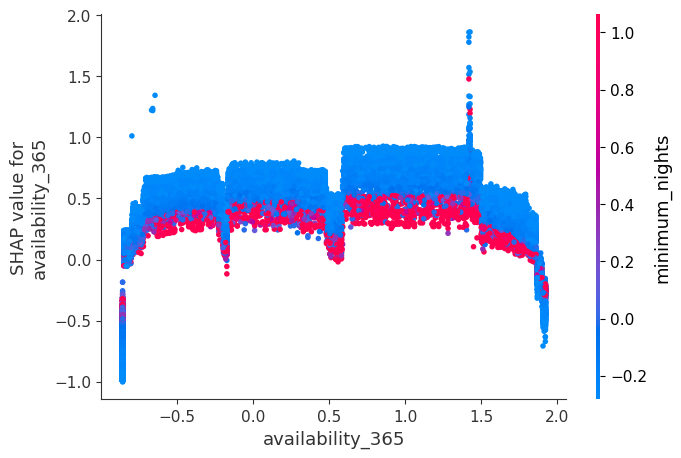

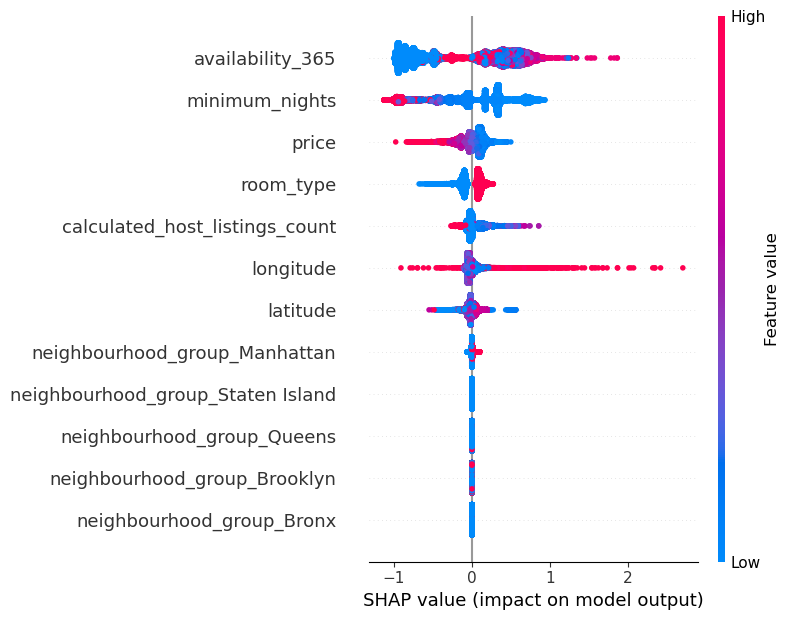

In [40]:
import shap
column_transformer.fit(X_train, y_train)
feature_names = numeric_feats + ordinal_feats + categorical_feats

X_train_enc = pd.DataFrame(
    data=column_transformer.transform(X_train),
    columns=column_names,
    index=X_train.index,
)
X_train_enc.head()

X_test_enc = pd.DataFrame(
    data=column_transformer.transform(X_test),
    columns=column_names,
    index=X_test.index,
)
X_test_enc.head()

gbr_tuned = GradientBoostingRegressor(
    random_state=123,
    learning_rate=gb_grid.best_params_["gradientboostingregressor__learning_rate"],
    n_estimators=gb_grid.best_params_["gradientboostingregressor__n_estimators"],
)

pipe_sklearn_GB.named_steps["gradientboostingregressor"].fit(X_train_enc, y_train)
gbr_explainer = shap.TreeExplainer(pipe_sklearn_GB.named_steps["gradientboostingregressor"])
train_gbr_shap_values = gbr_explainer.shap_values(X_train_enc)
train_gbr_shap_values

test_gbr_shap_values = gbr_explainer.shap_values(X_test_enc)

shap.initjs()

values = np.abs(train_gbr_shap_values).mean(0)
pd.DataFrame(data=values, index=column_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

shap.dependence_plot("availability_365", train_gbr_shap_values, X_train_enc)
shap.summary_plot(train_gbr_shap_values, X_train_enc)


The two highest affecting features are availability_365 and minimum_nights

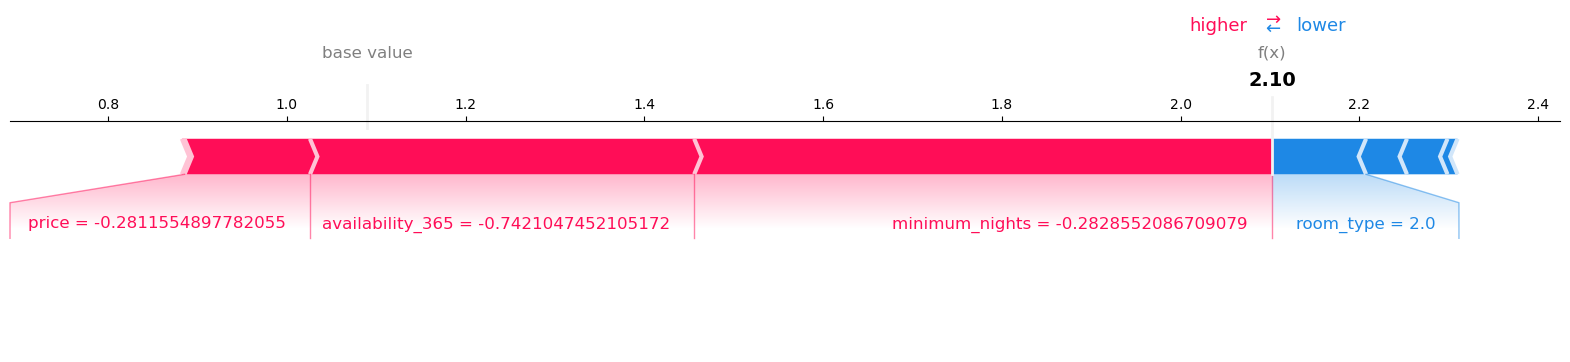

In [41]:


test_gbr_shap_values = gbr_explainer.shap_values(X_test_enc)
gbr_tuned.fit(X_train_enc, y_train)
gbr_tuned.predict(X_test_enc).mean()

gbr_explainer.expected_value
#shap force plot
shap.force_plot(
    gbr_explainer.expected_value,
    test_gbr_shap_values[1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)


From the plot above, it seems like availability_365 is the most important feature calculated_host_listings_count seems to be the 2nd most important feature.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [42]:
pipe_best = make_pipeline(
    column_transformer,
    GradientBoostingRegressor(n_estimators=1, max_depth=1, random_state=123))

In [43]:
pipe_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                                   OrdinalEncoder(categories=[['missing',
                                                                                               'Shared '
                                                                                               'room',
                                                                                               'Private '
                                                                                               'room',
                                                                                               'Entire '
                                                                                               'home/apt']],
                                                                                  dtype=<class 'int'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'host_name', 'host_id',
                                                   'number_of_reviews',
                                                   'neighbourhood',
                                                   'last_review', 'name'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=1, n_estimators=1,
                                           random_state=123))])

In [44]:
y_pred = pipe_best.predict(X_test)
print(y_pred[:5])

[1.01505516 1.13196208 1.01505516 1.13196208 1.01505516]


In [45]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
-rmse

-1.5370652132110048

Our best performing model is GradientBoostingRegressor with n_estimators=1, max_depth=1. The test score (negative mean squared error) of tuned model is -1.537. The test score agrees with the validation score from before. We trust the result because the test error is relatively low compared to other models we trained. We do not have issues with optimization bias because the training error is not that low, the model is not overfitting.

In [46]:
print(y_test.iloc[0])
print(y_pred[0])

0.0
1.0150551631704594


For the first row in the test set, the predicted value is 1.015 while the true value is 0. The force plot suggests that price, availability_365, and minimum_nights are pulling the prediction towards positive and room_type contribute the most in pulling the prediction towards negative.

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [49]:
final_df = {"Machine Learning Model": ["DummyRegressor", "Ridge", "SVR", "RandomForestRegressor", "GradientBoostingRegressor"],
            "Train Score": [np.mean(dummy_scores["train_score"]), np.mean(ridge_scores["train_score"]), np.mean(svr_scores["train_score"]), np.mean(rf_scores["train_score"]), np.mean(gb_scores["train_score"])],
"Test Score (neg_root_mean_squared_error)": [np.mean(dummy_scores["test_score"]), np.mean(ridge_scores["test_score"]), np.mean(svr_scores["test_score"]), np.mean(rf_scores["test_score"]), np.mean(gb_scores["test_score"])],
"Optimized Parameters": ["n/a", 10, best_C, best_rf_params, best_gb_params]}
pd.DataFrame(final_df)

,Machine Learning Model,Train Score,Test Score (neg_root_mean_squared_error),Optimized Parameters
0,DummyRegressor,-1.614460,-1.613805,n/a
1,Ridge,-1.555075,-1.555854,10
2,SVR,-1.470402,-1.472602,{'svr__C': 10}
3,RandomForestRegressor,-0.482535,-1.287909,"{'randomforestregressor__max_depth': 1, 'rando..."
4,GradientBoostingRegressor,-1.297128,-1.318081,{'gradientboostingregressor__learning_rate': 1...


From the table above we can see that the machine learning model with the lowest root_mean_squared_error is RandomForestRegressor. However, due to its high training score, the model is likely overfitting and thus we choose GradientBoostringRegressor, which is the model with the second lowest test error as our best performing model. 

Ideas that we didn't try but could potentially improve the performance is trying a greater range of hyperparameter values using GridSearchCV. Due to the long runnig time, we only tried 4 values for each hyperparameter. Also we could plot confusion matrices to visualize the FP, FN, TP, TN. We can use these values to calculate precision, recall, and f1 score to improve the performance of our models.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

Our biggest takeaway from the supervised machine learning is that selecting appropriate assessment metrics based on the data is crucial in building well-performing supervised machine learning models. Initially we choose MAPE as our evaluation metric, but the errors we got were around 10^14. When MAPE calculates the percentage error, the 0's in the dataset makes the error extremely big, so in this case MAPE is not a useful indicator of how our models perform.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)